In [2]:
import requests
import os
import json

def fetch_noaa_data(api_key):
    base_url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"
    dataset_id = "GHCND"
    location_id = "ZIP:80249"
    date_ranges = [
        ("2008-12-15", "2009-01-21"),
        ("2009-12-15", "2010-01-21"),
        ("2010-12-15", "2011-01-21"),
        ("2011-12-15", "2012-01-21"),
        ("2012-12-15", "2013-01-21"),
        ("2013-12-15", "2014-01-21"),
        ("2014-12-15", "2015-01-21"),
        ("2015-12-15", "2016-01-21"),
        ("2016-12-15", "2017-01-21"),
        ("2017-12-15", "2018-01-21"),
        ("2018-12-15", "2019-01-21"),
        ("2019-12-15", "2020-01-21"),
        ("2020-12-15", "2021-01-21"),
        ("2021-12-15", "2022-01-21")
    ]
    
    # Create 'data' directory if it does not exist
    if not os.path.exists('data'):
        os.makedirs('data')

    for start_date, end_date in date_ranges:
        params = {
            "datasetid": dataset_id,
            "locationid": location_id,
            "startdate": start_date,
            "enddate": end_date,
            "units": "standard",
            "limit": 1000,
        }
        headers = {"token": api_key}  # Include API key in headers
        try:
            response = requests.get(base_url, params=params, headers=headers)
            response.raise_for_status()  # Raise an exception for HTTP errors
            data = response.json()
            with open(f"data/winter_{start_date.split('-')[0]}-{end_date.split('-')[0]}.json", "w") as f:
                json.dump(data, f)
        except requests.exceptions.HTTPError as err:
            print(f"HTTP error occurred: {err}")
        except json.JSONDecodeError as err:
            print(f"Error decoding JSON response: {err}")
        except Exception as err:
            print(f"An unexpected error occurred: {err}")

# NOAA API key
api_key = "aQxLGxOGvBgqVedWxLBqsuxrzQnPRhSb"
fetch_noaa_data(api_key)


In [6]:
import json
import pandas as pd

def json_to_csv():
    # Combine all JSON files into a single DataFrame
    df_list = []
    for year in range(2008, 2022):
        file_name = f"data/winter_{year}-{year + 1}.json"
        with open(file_name) as f:
            data = json.load(f)
            df = pd.json_normalize(data["results"])
            df_list.append(df)
    final_df = pd.concat(df_list)
    
    # Extract required columns and calculate TAVG
    final_df["date"] = pd.to_datetime(final_df["date"])
    final_df = final_df.pivot_table(index=["date"], columns="datatype", values="value", aggfunc="mean")
    final_df["TAVG"] = (final_df["TMAX"] + final_df["TMIN"]) / 2
    
    # Export DataFrame to CSV
    final_df.to_csv("data/all_data_max_min_avg.csv")

json_to_csv()


In [35]:
# Step 1: Check data types
print(weather_data.dtypes)

# Step 2: Handle missing values
# Option 1: Impute missing values with the column mean
weather_data.fillna(weather_data.mean(), inplace=True)

# Option 2: Remove rows with missing values
# weather_data.dropna(inplace=True)

# Step 3: Compute the average of the DataFrame
avg_data = weather_data.mean()
print("Average of the DataFrame:")
print(avg_data)


date     object
ADPT    float64
ASLP    float64
ASTP    float64
AWBT    float64
AWND    float64
DAPR    float64
FMTM    float64
MDPR    float64
PGTM    float64
PRCP    float64
PSUN    float64
RHAV    float64
RHMN    float64
RHMX    float64
SNOW    float64
SNWD    float64
TAVG    float64
TMAX    float64
TMIN    float64
TSUN    float64
WDF2    float64
WDF5    float64
WSF2    float64
WSF5    float64
WT01    float64
WT02    float64
WT03    float64
WT06    float64
WT07    float64
WT08    float64
WT09    float64
WT11    float64
WT13    float64
WT14    float64
WT15    float64
WT16    float64
WT17    float64
WT18    float64
WT22    float64
dtype: object
Average of the DataFrame:
ADPT      -98.436992
ASLP    10163.997959
ASTP     8311.159184
AWBT      -39.859756
AWND        9.512016
DAPR        2.000000
FMTM     1346.570175
MDPR        0.250000
PGTM     1369.260870
PRCP        0.015564
PSUN       81.736842
RHAV       55.168016
RHMN       35.050607
RHMX       75.694332
SNOW        0.238113
SNWD 

C:\Users\ARPAN\AppData\Local\Temp\ipykernel_6628\136099662.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_data.fillna(weather_data.mean(), inplace=True)
C:\Users\ARPAN\AppData\Local\Temp\ipykernel_6628\136099662.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_data = weather_data.mean()


In [46]:
def average_warmest(df):
    """
    Compute the average of the warmest temperatures in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing temperature data.

    Returns:
    float: Average of the warmest temperatures in the DataFrame.
    """
    # Convert 'TMAX' column to numeric
    df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')

    # Drop rows with missing values in 'TMAX' column
    cleaned_data = df.dropna(subset=['TMAX'])

    # Compute the average of the 'TMAX' column
    avg_warmest_temperature = cleaned_data['TMAX'].mean()

    return avg_warmest_temperature

# Call the function with your DataFrame
avg_warmest_temp = average_warmest(weather_data)
print("Average of the warmest temperatures:", avg_warmest_temp)


Average of the warmest temperatures: 17.4437984496124


In [42]:
def average_coldest(df):
    """
    Compute the average of the coldest temperatures in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing temperature data.

    Returns:
    float: Average of the coldest temperatures in the DataFrame.
    """
    # Convert 'TMIN' column to numeric
    df['TMIN'] = pd.to_numeric(df['TMIN'], errors='coerce')

    # Drop rows with missing values in 'TMIN' column
    cleaned_data = df.dropna(subset=['TMIN'])

    # Compute the average of the 'TMIN' column
    avg_coldest_temperature = cleaned_data['TMIN'].mean()

    return avg_coldest_temperature

# Call the function with your DataFrame
avg_coldest_temp = average_coldest(weather_data)
print("Average of the coldest temperatures:", avg_coldest_temp)


Average of the coldest temperatures: 17.4437984496124


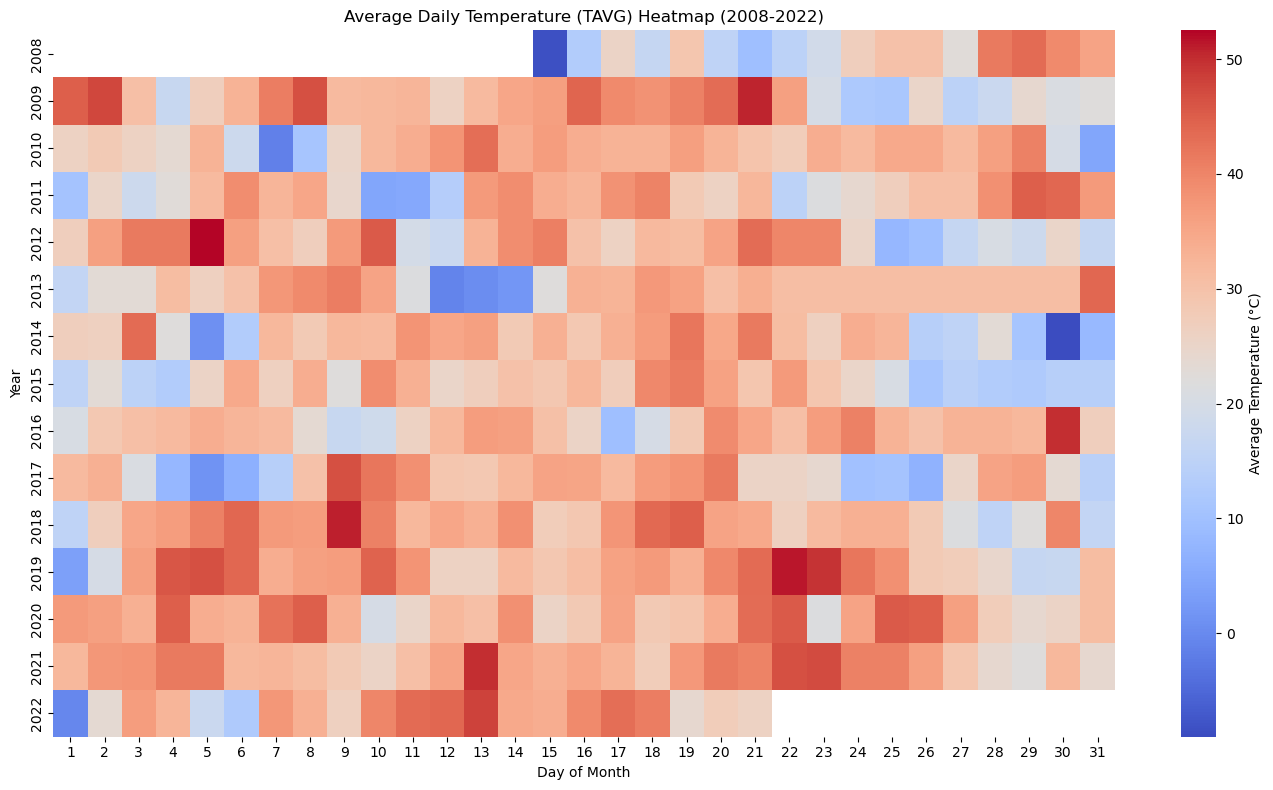

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'weather_data'
# Convert 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Set the 'date' column as the index
weather_data.set_index('date', inplace=True)

# Extract the year, month, and day from the index
weather_data['Year'] = weather_data.index.year
weather_data['Month'] = weather_data.index.month
weather_data['Day'] = weather_data.index.day

# Pivot the DataFrame to have years as rows and days as columns, with TAVG values as the entries
pivot_data = weather_data.pivot_table(index='Year', columns='Day', values='TAVG')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap='coolwarm', cbar_kws={'label': 'Average Temperature (°C)'})
plt.title('Average Daily Temperature (TAVG) Heatmap (2008-2022)')
plt.xlabel('Day of Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()
